In [118]:
import pandas as pd
%matplotlib inline
xls = pd.ExcelFile("tabula-2015 Pedestrians city.xlsx")
city = xls.parse('tabula-2015 Pedestrians city')
by_year = xls.parse('Sheet1')
by_age = xls.parse('Sheet2')
gender_age_killed = xls.parse("Sheet4")
gender_age_injured = xls.parse("Sheet5")


In [2]:
city.head()

,City,Resident Population,Total Traffic Fatalities,Pedestrian Fatalities,Percentage of Fatality Rate per,"Total Traffic 100,000 Population",Fatalities Total Pedestrian
0,"New York, NY",8550405,241,131,54.4% 2.82 1.53,NaN,NaN
1,"Los Angeles, CA",3971883,224,85,37.9% 5.64 2.14,NaN,NaN
2,"Chicago, IL",2720546,121,46,38.0% 4.45 1.69,NaN,NaN
3,"Houston, TX",2296224,211,62,29.4% 9.19 2.70,NaN,NaN
4,"Philadelphia, PA",1567442,93,26,28.0% 5.93 1.66,NaN,NaN


In [3]:
by_year = by_year.dropna()
by_year

,Year,Total Fatalities,Pedestrian Fatalities,Percentage of Total Fatalities
1,2006.0,42708.0,4795.0,0.11
3,2007.0,41259.0,4699.0,0.11
5,2008.0,37423.0,4414.0,0.12
7,2009.0,33883.0,4109.0,0.12
9,2010.0,32999.0,4302.0,0.13
11,2011.0,32479.0,4457.0,0.14
13,2012.0,33782.0,4818.0,0.14
15,2013.0,32893.0,4779.0,0.15
17,2014.0,32744.0,4910.0,0.15
19,2015.0,35092.0,5376.0,0.15


In [83]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42

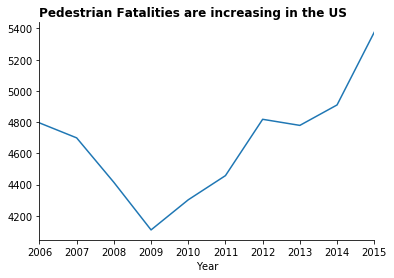

In [86]:
ax = by_year.plot(kind = "line", x="Year", y ="Pedestrian Fatalities", legend = False)
ax.set_title("Pedestrian Fatalities are increasing in the US", loc='left', fontweight="bold")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("US_pedestrians_fatalities.pdf")


In [5]:
by_age.head()


,Age,Total Killed,Pedestrians Killed,Percentage Killed who were Pedestriansa
0,0â€“4,373,77,0.21
1,5â€“9,353,73,0.21
2,10â€“14,406,83,0.20
3,Children (â‰¤14),1132,233,0.21
4,15â€“19,2521,223,0.09


In [7]:
by_age["Age"]  = by_age["Age"].str.replace("â€“", "-")
by_age["Age"] = by_age["Age"].str.replace("â‰¤", "<")
by_age["Age"] = by_age["Age"].str.replace("*", "")


In [92]:
by_age = by_age[(by_age["Age"] != "Children (<14)") & (by_age["Age"] != "Seniors (65+)") & (by_age["Age"] != "Total")]
by_age

,Age,Total Killed,Pedestrians Killed,Percentage Killed who were Pedestriansa
0,0-4,373,77,0.21
1,5-9,353,73,0.21
2,10-14,406,83,0.20
4,15-19,2521,223,0.09
5,20-24,4205,411,0.10
6,25-29,3527,407,0.12
7,30-34,2754,344,0.12
8,35-39,2414,384,0.16
9,40-44,2238,370,0.17
10,45-49,2356,422,0.18


In [95]:
by_age.columns = ["Age", "total killed", "pedestrians_killed", "Percentage"]

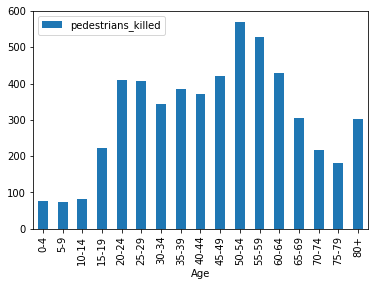

In [96]:
by_age.plot(x = "Age", y = "pedestrians_killed", kind = "bar")

In [9]:
city["Total Traffic 100,000 Population"] = city["Percentage of Fatality Rate per"].str.split(" ", 2, expand = True)[1]
city["Fatalities Total Pedestrian"] = city["Percentage of Fatality Rate per"].str.split(" ", 2, expand = True)[2]

In [10]:
city.head()

,City,Resident Population,Total Traffic Fatalities,Pedestrian Fatalities,Percentage of Fatality Rate per,"Total Traffic 100,000 Population",Fatalities Total Pedestrian
0,"New York, NY",8550405,241,131,54.4% 2.82 1.53,2.82,1.53
1,"Los Angeles, CA",3971883,224,85,37.9% 5.64 2.14,5.64,2.14
2,"Chicago, IL",2720546,121,46,38.0% 4.45 1.69,4.45,1.69
3,"Houston, TX",2296224,211,62,29.4% 9.19 2.70,9.19,2.70
4,"Philadelphia, PA",1567442,93,26,28.0% 5.93 1.66,5.93,1.66


In [11]:
city["Percentage of Fatality Rate per"] = city["Percentage of Fatality Rate per"].str.split(" ", 2, expand = True)[0]


In [12]:
city.head()

,City,Resident Population,Total Traffic Fatalities,Pedestrian Fatalities,Percentage of Fatality Rate per,"Total Traffic 100,000 Population",Fatalities Total Pedestrian
0,"New York, NY",8550405,241,131,54.4%,2.82,1.53
1,"Los Angeles, CA",3971883,224,85,37.9%,5.64,2.14
2,"Chicago, IL",2720546,121,46,38.0%,4.45,1.69
3,"Houston, TX",2296224,211,62,29.4%,9.19,2.70
4,"Philadelphia, PA",1567442,93,26,28.0%,5.93,1.66


In [13]:
city["Fatalities Total Pedestrian"] = city["Fatalities Total Pedestrian"].astype(float)

In [61]:
city["City"] = city["City"].str.split(",", 1, expand=True)[0]

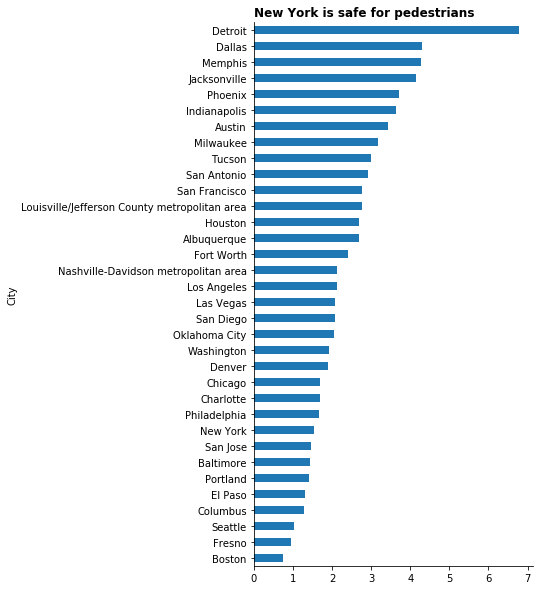

In [69]:
# city.sort_values(by = "Fatalities Total Pedestrian", ascending  = True).plot(kind = "barh", x = "City", y = "Fatalities Total Pedestrian")
ax = city.sort_values(by = "Fatalities Total Pedestrian", ascending  = True).plot(x = "City", y = "Fatalities Total Pedestrian", kind = "barh", figsize=(5,10), legend=False)
ax.set_title("New York is safe for pedestrians", loc='left', fontweight="bold")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("US_cities_pedestrians_fatalities.pdf")


In [15]:
State = pd.read_csv("tabula-2015 Pedestrians Traffic Safety Fact Sheet.csv")
State.head()

,State,Resident Population,Total Traffic Fatalities,Pedestrian Fatalities,Percentage of Total Traffic Fatalities,"Pedestrian Fatalities per 100,000 Population"
0,Alabama,"4,858,979",849,98,11.5%,2.02
1,Alaska,"738,432",65,12,18.5%,1.63
2,Arizona,"6,828,065",893,153,17.1%,2.24
3,Arkansas,"2,978,204",531,43,8.1%,1.44
4,California,"39,144,818","3,176",742,23.4%,1.90


In [98]:
State.columns = ["State", "resident_population", "traffic_fatalities", "pedestrian_fatalities", "Percentage_Traffic", "pedestrian_fatalities_per_100,000_population"]

In [102]:
State.dtypes

State                                            object
resident_population                              object
traffic_fatalities                               object
pedestrian_fatalities                            object
Percentage_Traffic                               object
pedestrian_fatalities_per_100,000_population    float64
dtype: object

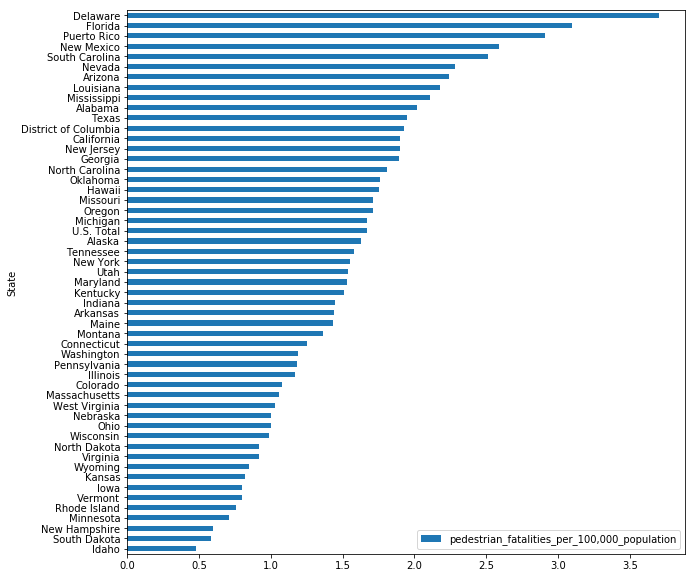

In [105]:
State.sort_values(by = "pedestrian_fatalities_per_100,000_population").plot(x = "State", y="pedestrian_fatalities_per_100,000_population", kind= "barh", figsize=(10,10))

In [16]:
Violations = pd.read_csv("Moving Violations NYC - Sheet1.csv")
Violations.head()

,Offense Description,MTD2017,YTD2017,Unnamed: 3
0,Backing Unsafely,113,457,http://www1.nyc.gov/site/nypd/stats/reports-an...
1,Brake Lights (Defect.or Improper),804,3176,NaN
2,"Bus Lane, Driving in",215,608,NaN
3,Cell Phone,6084,24984,NaN
4,Commercial Veh on Pkwy,171,597,NaN


In [17]:
Violations = Violations[Violations["Offense Description"] != "CitywideTOTAL Movers"]

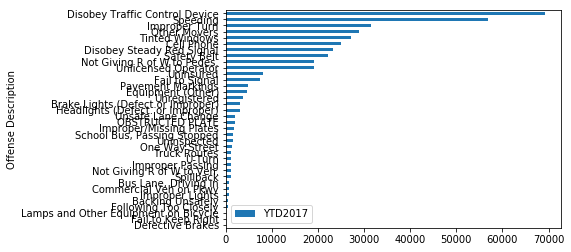

In [18]:
Violations.sort_values(by = "YTD2017").plot(kind = "barh", x = "Offense Description", y = "YTD2017")

In [74]:
fatality_yearly = pd.read_csv("fatality_yearly.csv")
fatality_yearly.head()

,Fatalities,PedFatalit,BikeFatali,MVOFatalit,YR,NODEID,nodeX,nodeY,STREET1,STREET2
0,1,1,0,0,2016,133,9.152118e+05,125369.6338,MAIN STREET,CRAIG AVENUE
1,1,1,0,0,2016,66755,9.504343e+05,148754.0582,RICHMOND ROAD,AMBOY ROAD
2,1,0,1,0,2016,19991,9.806329e+05,200300.1903,WARREN STREET,WEST STREET
3,1,0,0,1,2016,21041,9.820096e+05,211104.7255,11 AVENUE,WEST 19 STREET
4,1,0,0,1,2016,26907,1.004801e+06,181823.0229,EAST NEW YORK AVENUE,BUFFALO AVENUE


In [75]:
fatality_yearly = fatality_yearly[fatality_yearly["YR"] != 2017]

In [76]:
fatality_yearly.head()

,Fatalities,PedFatalit,BikeFatali,MVOFatalit,YR,NODEID,nodeX,nodeY,STREET1,STREET2
0,1,1,0,0,2016,133,9.152118e+05,125369.6338,MAIN STREET,CRAIG AVENUE
1,1,1,0,0,2016,66755,9.504343e+05,148754.0582,RICHMOND ROAD,AMBOY ROAD
2,1,0,1,0,2016,19991,9.806329e+05,200300.1903,WARREN STREET,WEST STREET
3,1,0,0,1,2016,21041,9.820096e+05,211104.7255,11 AVENUE,WEST 19 STREET
4,1,0,0,1,2016,26907,1.004801e+06,181823.0229,EAST NEW YORK AVENUE,BUFFALO AVENUE


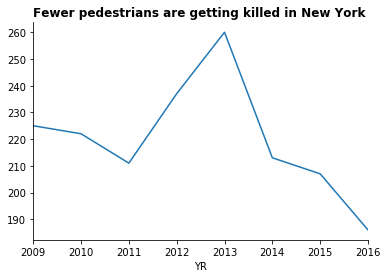

In [78]:
ax = fatality_yearly.groupby("YR")["Fatalities"].sum().plot()
ax.set_title("Fewer pedestrians are getting killed in New York", loc='left', fontweight="bold")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("NY_killed_year.pdf")


In [21]:
injury_yearly = pd.read_csv("injury_yearly.csv")
injury_yearly.head()

,Injuries,PedInjurie,BikeInjuri,MVOInjurie,YR,NODEID,nodeX,nodeY,STREET1,STREET2
0,9,0,0,9,2016,26259,1.004135e+06,173254.3727,EAST 51 STREET,AVENUE D
1,1,0,1,0,2016,40916,1.005782e+06,201740.1645,48 STREET,58 ROAD
2,2,2,0,0,2016,58711,1.043651e+06,204480.9559,183 STREET,UNION TURNPIKE
3,5,1,0,4,2016,22834,9.945068e+05,217073.5026,2 AVENUE,EAST 62 STREET
4,10,0,0,10,2016,26856,1.003705e+06,181193.9234,EAST NEW YORK AVENUE,EAST 92 STREET


In [79]:
injury_yearly = injury_yearly[injury_yearly["YR"] != 2017]

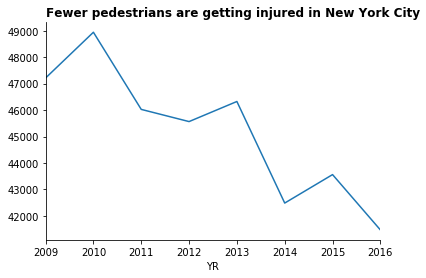

In [81]:
ax = injury_yearly.groupby("YR")["Injuries"].sum().plot()
ax.set_title("Fewer pedestrians are getting injured in New York City", loc='left', fontweight="bold")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("NY_injured_year.pdf")

In [23]:
injury_yearly[injury_yearly["YR"] == 2016]

,Injuries,PedInjurie,BikeInjuri,MVOInjurie,YR,NODEID,nodeX,nodeY,STREET1,STREET2
0,9,0,0,9,2016,26259,1.004135e+06,173254.3727,EAST 51 STREET,AVENUE D
1,1,0,1,0,2016,40916,1.005782e+06,201740.1645,48 STREET,58 ROAD
2,2,2,0,0,2016,58711,1.043651e+06,204480.9559,183 STREET,UNION TURNPIKE
3,5,1,0,4,2016,22834,9.945068e+05,217073.5026,2 AVENUE,EAST 62 STREET
4,10,0,0,10,2016,26856,1.003705e+06,181193.9234,EAST NEW YORK AVENUE,EAST 92 STREET
5,2,1,0,1,2016,24836,1.000203e+06,155541.9347,EAST 28 STREET,AVENUE X
6,1,0,0,1,2016,4697,9.429497e+05,145009.6529,TANGLEWOOD DRIVE,TEAKWOOD COURT
7,4,1,0,3,2016,22692,9.929369e+05,216749.6843,LEXINGTON AVENUE,EAST 58 STREET
8,2,1,0,1,2016,18028,9.924239e+05,174384.0158,TURNER PLACE,CONEY ISLAND AVENUE
9,1,1,0,0,2016,37592,1.046036e+06,199580.0146,185 STREET,184 PLACE


In [112]:
gender_age_killed["Age (Years) male"] = gender_age_killed["Age (Years) male"].str.replace("â€“", "-")
# by_age["Age"] = by_age["Age"].str.replace("â‰¤", "<")
gender_age_killed.head()


,Age (Years) male,Killed male,Population (thousands) male,Fatality Rate male,Killed Female,Population (thousands) Female,Fatality Rate Female
0,0-4,44,10178,0.43,33,9730,0.34
1,5-9,43,10459,0.41,30,10028,0.30
2,10-14,58,10520,0.55,25,10102,0.25
3,Children (â‰¤14),145,31157,0.47,88,29860,0.29
4,15-19,140,10798,1.30,83,10311,0.80


In [113]:
gender_age_killed

,Age (Years) male,Killed male,Population (thousands) male,Fatality Rate male,Killed Female,Population (thousands) Female,Fatality Rate Female
0,0-4,44,10178,0.43,33,9730,0.34
1,5-9,43,10459,0.41,30,10028,0.30
2,10-14,58,10520,0.55,25,10102,0.25
3,Children (â‰¤14),145,31157,0.47,88,29860,0.29
4,15-19,140,10798,1.30,83,10311,0.80
5,20-24,313,11668,2.68,98,11071,0.89
6,25-29,303,11409,2.66,104,11052,0.94
7,30-34,243,10890,2.23,100,10786,0.93
8,35-39,276,10173,2.71,108,10201,1.06
9,40-44,265,10030,2.64,104,10185,1.02


In [115]:
gender_age_killed = gender_age_killed[(gender_age_killed["Age (Years) male"] != "Children (â‰¤14)") & (gender_age_killed["Age (Years) male"] != "Seniors (65+)") & (gender_age_killed["Age (Years) male"] != "Total")]
gender_age_killed

,Age (Years) male,Killed male,Population (thousands) male,Fatality Rate male,Killed Female,Population (thousands) Female,Fatality Rate Female
0,0-4,44,10178,0.43,33,9730,0.34
1,5-9,43,10459,0.41,30,10028,0.30
2,10-14,58,10520,0.55,25,10102,0.25
4,15-19,140,10798,1.30,83,10311,0.80
5,20-24,313,11668,2.68,98,11071,0.89
6,25-29,303,11409,2.66,104,11052,0.94
7,30-34,243,10890,2.23,100,10786,0.93
8,35-39,276,10173,2.71,108,10201,1.06
9,40-44,265,10030,2.64,104,10185,1.02
10,45-49,288,10335,2.79,134,10519,1.27


In [122]:
gender_age_injured.columns = ["Age", "Injured Male", "Population (thousands) Male", "Injury Rate Male", "Injured Female", "Population (thousands) Female", "Injury Rate Female"]


In [124]:
gender_age_injured["Age"] = gender_age_injured["Age"].str.replace("â€“", "-")
gender_age_injured

,Age,Injured Male,Population (thousands) Male,Injury Rate Male,Injured Female,Population (thousands) Female,Injury Rate Female
0,0-4,0,10178,4,1000,9730,9
1,5-9,1000,10459,11,1000,10028,8
2,10-14,3000,10520,25,2000,10102,24
3,Children (â‰¤14),4000,31157,13,4000,29860,13
4,15-19,4000,10798,40,3000,10311,30
5,20-24,4000,11668,38,4000,11071,34
6,25-29,3000,11409,29,3000,11052,26
7,30-34,3000,10890,26,1000,10786,12
8,35-39,2000,10173,20,1000,10201,14
9,40-44,2000,10030,24,1000,10185,12


In [125]:
gender_age_injured = gender_age_injured[(gender_age_injured["Age"] != "Children (â‰¤14)") & (gender_age_injured["Age"] != "Seniors (65+)") & (gender_age_injured["Age"] != "Total")]
gender_age_injured

,Age,Injured Male,Population (thousands) Male,Injury Rate Male,Injured Female,Population (thousands) Female,Injury Rate Female
0,0-4,0,10178,4,1000,9730,9
1,5-9,1000,10459,11,1000,10028,8
2,10-14,3000,10520,25,2000,10102,24
4,15-19,4000,10798,40,3000,10311,30
5,20-24,4000,11668,38,4000,11071,34
6,25-29,3000,11409,29,3000,11052,26
7,30-34,3000,10890,26,1000,10786,12
8,35-39,2000,10173,20,1000,10201,14
9,40-44,2000,10030,24,1000,10185,12
10,45-49,2000,10335,19,3000,10519,26


In [117]:
gender_age_killed.to_csv("gender_age_killed.csv")

In [126]:
gender_age_injured.to_csv("gender_age_injured.csv")

In [24]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [25]:
pedestrians_ny = gpd.read_file("Shapefile/PedCountLocationsMay2016.shp")
pd.set_option("display.max_columns", 100)

pedestrians_ny.head()

,Borough,From_Stree,Index,Loc,May07_AM,May07_D,May07_D2,May07_MD,May07_PM,May08_AM,May08_D,May08_D2,May08_MD,May08_PM,May09_AM,May09_D,May09_D2,May09_MD,May09_PM,May10_AM,May10_D,May10_D2,May10_MD,May10_PM,May11_AM,May11_D,May11_D2,May11_MD,May11_PM,May12_AM,May12_D,May12_D2,May12_MD,May12_PM,May13_AM,May13_D,May13_D2,May13_MD,May13_PM,May14_AM,May14_D,May14_D2,May14_MD,May14_PM,May15_AM,May15_D,May15_D2,May15_MD,May15_PM,Sept07_AM,Sept07_D,Sept07_D2,Sept07_MD,Sept07_PM,Sept08_AM,Sept08_D,Sept08_D2,Sept08_MD,Sept08_PM,Sept09_AM,Sept09_D,Sept09_D2,Sept09_MD,Sept09_PM,Sept10_AM,Sept10_D,Sept10_D2,Sept10_MD,Sept10_PM,Sept11_AM,Sept11_D,Sept11_D2,Sept11_MD,Sept11_PM,Sept12_AM,Sept12_D,Sept12_D2,Sept12_MD,Sept12_PM,Sept13_AM,Sept13_D,Sept13_D2,Sept13_MD,Sept13_PM,Sept14_AM,Sept14_D,Sept14_D2,Sept14_MD,Sept14_PM,Sept15_AM,Sept15_D,Sept15_D2,Sept15_MD,Sept15_PM,Street_Nam,To_Street,geometry
0,Bronx,West 231st Street,N,1.0,1189,5/10/2007,5/5/2007,2508,4094,802,5/1/2008,5/17/2008,2631,4015,1001,5/5/2009,5/2/2009,2832,3475,1010,5/6/2010,5/1/2010,3128,3609,997,5/10/2011,4/30/2011,2687,4440,1288,5/3/2012,6/2/2012,3365,3328,"1,210",5/7/2013,5/18/2013,"3,825","4,710","1,220",5/8/2014,5/17/2014,"2,641","4,384","1,788",5/13/2015,5/16/2015,"3,033","4,980",734,9/25/2007,9/29/2007,2939,2646,1125,9/23/2008,10/4/2008,3420,4310,991,9/10/2009,9/26/2009,2469,4262,863,9/8/2010,9/11/2010,2217,4119,1328,9/8/2011,9/10/2011,2428,3820,"1,268",9/12/2012,9/15/2012,"2,276","4,315","1,206",10/1/2013,10/5/2013,"3,008","4,590","1,450",9/4/2014,9/6/2014,"2,996","4,646",1204,9/17/2015,9/12/2015,2999,4520,Broadway,Naples Terrace,POINT (1010633.857981443 259608.0766339302)
1,Bronx,Grand Concourse,Y,2.0,1511,5/10/2007,5/5/2007,1971,3184,1136,5/6/2008,5/17/2008,1522,2638,1351,5/5/2009,5/2/2009,1304,3111,2077,5/6/2010,5/1/2010,1409,3283,1734,5/5/2011,4/30/2011,1772,3333,1233,5/3/2012,6/2/2012,1912,1875,"2,278",5/1/2013,5/4/2013,"2,288","4,215","2,206",5/8/2014,5/17/2014,"2,315","4,363","2,318",5/19/2015,5/16/2015,"2,483","4,589",1855,9/25/2007,9/29/2007,1183,3754,1939,9/23/2008,10/4/2008,1383,3283,1227,9/10/2009,9/26/2009,2762,3137,1007,9/14/2010,9/11/2010,1477,3069,2051,9/14/2011,9/10/2011,1752,3525,"2,113",9/12/2012,9/22/2012,"1,970","4,099","2,071",9/18/2013,9/21/2013,"1,832","3,890","1,949",9/11/2014,9/13/2014,"2,388","4,435",2005,9/17/2015,9/26/2015,2512,4790,East 161st Street,Sheridan Avenue,POINT (1005868.834046945 240449.7153444439)
2,Bronx,Valentine Avenue,Y,3.0,1832,5/10/2007,5/5/2007,14391,12311,1061,5/1/2008,5/17/2008,7927,8013,1689,5/5/2009,5/2/2009,7472,8374,2285,5/6/2010,5/1/2010,10424,10943,2289,5/10/2011,4/30/2011,9167,15890,2125,5/3/2012,6/9/2012,7022,7635,"2,710",5/1/2013,5/4/2013,"8,872","12,723","2,699",5/8/2014,5/17/2014,"6,339","12,490","2,382",5/13/2015,5/16/2015,"7,574","11,216",1829,9/25/2007,9/29/2007,15065,9215,2497,9/23/2008,10/4/2008,8013,10010,2387,9/10/2009,9/26/2009,6614,10655,2807,9/8/2010,9/11/2010,7714,12658,2679,9/8/2011,9/10/2011,8140,13548,"2,704",9/11/2012,9/15/2012,"7,421","10,486","2,651",10/1/2013,10/5/2013,"8,241","10,613","2,752",9/4/2014,9/6/2014,"8,266","10,408",2733,9/17/2015,9/12/2015,9072,10586,East Fordham Road,Tiebout Avenue,POINT (1013194.690458193 253401.0637855232)
3,Bronx,Bainbridge Avenue,N,4.0,764,5/10/2007,5/5/2007,1798,2673,2102,5/1/2008,5/17/2008,1989,3206,1536,5/5/2009,5/2/2009,1672,2997,2954,5/6/2010,5/1/2010,1717,3962,1661,5/10/2011,4/30/2011,1510,2844,1906,5/3/2012,6/9/2012,1261,2066,"2,052",5/1/2013,5/4/2013,"1,979","3,981","2,096",5/8/2014,5/17/2014,"1,333","3,378","1,757",5/13/2015,5/16/2015,"1,714","3,561",1360,9/25/2007,9/29/2007,872,1975,3020,9/23/2008,10/4/2008,1662,3915,2097,9/10/2009,9/26/2009,1591,3135,1622,9/8/2010,9/11/2010,1344,3006,1996,9/8/2011,9/10/2011,1587,2836,"2,371",9/12/2012,9/15/2012,"1,620","3,500","2,373",10/9/2013,10/12/2013,"1,914","3,660","2,382",9/4/2014,9/6/2014,"1,339","3,425",2256,9/17/2015,9/12/2015,1574,2923,East Gun Hill Road,Rochambeau Avenue,POINT (1017730.564260438 26

In [26]:
pedestrians_ny.to_crs({"init": "epsg:4326"}, inplace = True)

In [27]:
pedestrians_ny["Sep15_Total"] = pedestrians_ny["Sept15_AM"] + pedestrians_ny["Sept15_MD"] + pedestrians_ny["Sept15_PM"]

In [28]:
pedestrians_ny.drop(["Sept15_PM", "Sept15_MD", "Sept15_AM"], axis=1, inplace = True)

In [29]:
pedestrians_ny['Sept14_PM'] = pedestrians_ny['Sept14_PM'].str.replace(",", "")
pedestrians_ny['Sept14_MD'] = pedestrians_ny['Sept14_MD'].str.replace(",", "")
pedestrians_ny['Sept14_AM'] = pedestrians_ny['Sept14_AM'].str.replace(",", "")
pedestrians_ny['Sept13_PM'] = pedestrians_ny['Sept13_PM'].str.replace(",", "")
pedestrians_ny['Sept13_MD'] = pedestrians_ny['Sept13_MD'].str.replace(",", "")
pedestrians_ny['Sept13_AM'] = pedestrians_ny['Sept13_AM'].str.replace(",", "")
pedestrians_ny['Sept12_PM'] = pedestrians_ny['Sept12_PM'].str.replace(",", "")
pedestrians_ny['Sept12_MD'] = pedestrians_ny['Sept12_MD'].str.replace(",", "")
pedestrians_ny['Sept12_AM'] = pedestrians_ny['Sept12_AM'].str.replace(",", "")
pedestrians_ny['May15_PM'] = pedestrians_ny['May15_PM'].str.replace(",", "")
pedestrians_ny['May15_MD'] = pedestrians_ny['May15_MD'].str.replace(",", "")
pedestrians_ny['May15_AM'] = pedestrians_ny['May15_AM'].str.replace(",", "")
pedestrians_ny['May14_PM'] = pedestrians_ny['May14_PM'].str.replace(",", "")
pedestrians_ny['May14_MD'] = pedestrians_ny['May14_MD'].str.replace(",", "")
pedestrians_ny['May14_AM'] = pedestrians_ny['May14_AM'].str.replace(",", "")
pedestrians_ny['May13_PM'] = pedestrians_ny['May13_PM'].str.replace(",", "")
pedestrians_ny['May13_MD'] = pedestrians_ny['May13_MD'].str.replace(",", "")
pedestrians_ny['May13_AM'] = pedestrians_ny['May13_AM'].str.replace(",", "")
pedestrians_ny['May13_AM'] = pedestrians_ny['May13_AM'].str.replace(",", "")

pedestrians_ny.head()

,Borough,From_Stree,Index,Loc,May07_AM,May07_D,May07_D2,May07_MD,May07_PM,May08_AM,May08_D,May08_D2,May08_MD,May08_PM,May09_AM,May09_D,May09_D2,May09_MD,May09_PM,May10_AM,May10_D,May10_D2,May10_MD,May10_PM,May11_AM,May11_D,May11_D2,May11_MD,May11_PM,May12_AM,May12_D,May12_D2,May12_MD,May12_PM,May13_AM,May13_D,May13_D2,May13_MD,May13_PM,May14_AM,May14_D,May14_D2,May14_MD,May14_PM,May15_AM,May15_D,May15_D2,May15_MD,May15_PM,Sept07_AM,Sept07_D,Sept07_D2,Sept07_MD,Sept07_PM,Sept08_AM,Sept08_D,Sept08_D2,Sept08_MD,Sept08_PM,Sept09_AM,Sept09_D,Sept09_D2,Sept09_MD,Sept09_PM,Sept10_AM,Sept10_D,Sept10_D2,Sept10_MD,Sept10_PM,Sept11_AM,Sept11_D,Sept11_D2,Sept11_MD,Sept11_PM,Sept12_AM,Sept12_D,Sept12_D2,Sept12_MD,Sept12_PM,Sept13_AM,Sept13_D,Sept13_D2,Sept13_MD,Sept13_PM,Sept14_AM,Sept14_D,Sept14_D2,Sept14_MD,Sept14_PM,Sept15_D,Sept15_D2,Street_Nam,To_Street,geometry,Sep15_Total
0,Bronx,West 231st Street,N,1.0,1189,5/10/2007,5/5/2007,2508,4094,802,5/1/2008,5/17/2008,2631,4015,1001,5/5/2009,5/2/2009,2832,3475,1010,5/6/2010,5/1/2010,3128,3609,997,5/10/2011,4/30/2011,2687,4440,1288,5/3/2012,6/2/2012,3365,3328,1210,5/7/2013,5/18/2013,3825,4710,1220,5/8/2014,5/17/2014,2641,4384,1788,5/13/2015,5/16/2015,3033,4980,734,9/25/2007,9/29/2007,2939,2646,1125,9/23/2008,10/4/2008,3420,4310,991,9/10/2009,9/26/2009,2469,4262,863,9/8/2010,9/11/2010,2217,4119,1328,9/8/2011,9/10/2011,2428,3820,1268,9/12/2012,9/15/2012,2276,4315,1206,10/1/2013,10/5/2013,3008,4590,1450,9/4/2014,9/6/2014,2996,4646,9/17/2015,9/12/2015,Broadway,Naples Terrace,POINT (-73.9045914073068 40.87919896648571),120429994520
1,Bronx,Grand Concourse,Y,2.0,1511,5/10/2007,5/5/2007,1971,3184,1136,5/6/2008,5/17/2008,1522,2638,1351,5/5/2009,5/2/2009,1304,3111,2077,5/6/2010,5/1/2010,1409,3283,1734,5/5/2011,4/30/2011,1772,3333,1233,5/3/2012,6/2/2012,1912,1875,2278,5/1/2013,5/4/2013,2288,4215,2206,5/8/2014,5/17/2014,2315,4363,2318,5/19/2015,5/16/2015,2483,4589,1855,9/25/2007,9/29/2007,1183,3754,1939,9/23/2008,10/4/2008,1383,3283,1227,9/10/2009,9/26/2009,2762,3137,1007,9/14/2010,9/11/2010,1477,3069,2051,9/14/2011,9/10/2011,1752,3525,2113,9/12/2012,9/22/2012,1970,4099,2071,9/18/2013,9/21/2013,1832,3890,1949,9/11/2014,9/13/2014,2388,4435,9/17/2015,9/26/2015,East 161st Street,Sheridan Avenue,POINT (-73.92188432870219 40.82662794123289),200525124790
2,Bronx,Valentine Avenue,Y,3.0,1832,5/10/2007,5/5/2007,14391,12311,1061,5/1/2008,5/17/2008,7927,8013,1689,5/5/2009,5/2/2009,7472,8374,2285,5/6/2010,5/1/2010,10424,10943,2289,5/10/2011,4/30/2011,9167,15890,2125,5/3/2012,6/9/2012,7022,7635,2710,5/1/2013,5/4/2013,8872,12723,2699,5/8/2014,5/17/2014,6339,12490,2382,5/13/2015,5/16/2015,7574,11216,1829,9/25/2007,9/29/2007,15065,9215,2497,9/23/2008,10/4/2008,8013,10010,2387,9/10/2009,9/26/2009,6614,10655,2807,9/8/2010,9/11/2010,7714,12658,2679,9/8/2011,9/10/2011,8140,13548,2704,9/11/2012,9/15/2012,7421,10486,2651,10/1/2013,10/5/2013,8241,10613,2752,9/4/2014,9/6/2014,8266,10408,9/17/2015,9/12/2015,East Fordham Road,Tiebout Avenue,POINT (-73.89535781584335 40.86215460031514),2733907210586
3,Bronx,Bainbridge Avenue,N,4.0,764,5/10/2007,5/5/2007,1798,2673,2102,5/1/2008,5/17/2008,1989,3206,1536,5/5/2009,5/2/2009,1672,2997,2954,5/6/2010,5/1/2010,1717,3962,1661,5/10/2011,4/30/2011,1510,2844,1906,5/3/2012,6/9/2012,1261,2066,2052,5/1/2013,5/4/2013,1979,3981,2096,5/8/2014,5/17/2014,1333,3378,1757,5/13/2015,5/16/2015,1714,3561,1360,9/25/2007,9/29/2007,872,1975,3020,9/23/2008,10/4/2008,1662,3915,2097,9/10/2009,9/26/2009,1591,3135,1622,9/8/2010,9/11/2010,1344,3006,1996,9/8/2011,9/10/2011,1587,2836,2371,9/12/2012,9/15/2012,1620,3500,2373,10/9/2013,10/12/2013,1914,3660,2382,9/4/2014,9/6/2014,1339,3425,9/17/2015,9/12/2015,East Gun Hill Road,Rochambeau Avenue,POINT (-73.87892467324478 40.88128699598727),225615742923
4,Bronx,Prospect Avenue,N,5.0,650,5/10/2007,5/5/2007,2334,2538,553,4/29/2008,5/10/2008,1652,2438,684,5/5/2009,5/2/2009,2604,2660,1075,5/6/2010,5/15/2010,4085,5823,1093,5/24/2011,5/21/2011,4274,6119,627,5/31/2012,6/9/2012,2

In [30]:
pedestrians_ny.head()

,Borough,From_Stree,Index,Loc,May07_AM,May07_D,May07_D2,May07_MD,May07_PM,May08_AM,May08_D,May08_D2,May08_MD,May08_PM,May09_AM,May09_D,May09_D2,May09_MD,May09_PM,May10_AM,May10_D,May10_D2,May10_MD,May10_PM,May11_AM,May11_D,May11_D2,May11_MD,May11_PM,May12_AM,May12_D,May12_D2,May12_MD,May12_PM,May13_AM,May13_D,May13_D2,May13_MD,May13_PM,May14_AM,May14_D,May14_D2,May14_MD,May14_PM,May15_AM,May15_D,May15_D2,May15_MD,May15_PM,Sept07_AM,Sept07_D,Sept07_D2,Sept07_MD,Sept07_PM,Sept08_AM,Sept08_D,Sept08_D2,Sept08_MD,Sept08_PM,Sept09_AM,Sept09_D,Sept09_D2,Sept09_MD,Sept09_PM,Sept10_AM,Sept10_D,Sept10_D2,Sept10_MD,Sept10_PM,Sept11_AM,Sept11_D,Sept11_D2,Sept11_MD,Sept11_PM,Sept12_AM,Sept12_D,Sept12_D2,Sept12_MD,Sept12_PM,Sept13_AM,Sept13_D,Sept13_D2,Sept13_MD,Sept13_PM,Sept14_AM,Sept14_D,Sept14_D2,Sept14_MD,Sept14_PM,Sept15_D,Sept15_D2,Street_Nam,To_Street,geometry,Sep15_Total
0,Bronx,West 231st Street,N,1.0,1189,5/10/2007,5/5/2007,2508,4094,802,5/1/2008,5/17/2008,2631,4015,1001,5/5/2009,5/2/2009,2832,3475,1010,5/6/2010,5/1/2010,3128,3609,997,5/10/2011,4/30/2011,2687,4440,1288,5/3/2012,6/2/2012,3365,3328,1210,5/7/2013,5/18/2013,3825,4710,1220,5/8/2014,5/17/2014,2641,4384,1788,5/13/2015,5/16/2015,3033,4980,734,9/25/2007,9/29/2007,2939,2646,1125,9/23/2008,10/4/2008,3420,4310,991,9/10/2009,9/26/2009,2469,4262,863,9/8/2010,9/11/2010,2217,4119,1328,9/8/2011,9/10/2011,2428,3820,1268,9/12/2012,9/15/2012,2276,4315,1206,10/1/2013,10/5/2013,3008,4590,1450,9/4/2014,9/6/2014,2996,4646,9/17/2015,9/12/2015,Broadway,Naples Terrace,POINT (-73.9045914073068 40.87919896648571),120429994520
1,Bronx,Grand Concourse,Y,2.0,1511,5/10/2007,5/5/2007,1971,3184,1136,5/6/2008,5/17/2008,1522,2638,1351,5/5/2009,5/2/2009,1304,3111,2077,5/6/2010,5/1/2010,1409,3283,1734,5/5/2011,4/30/2011,1772,3333,1233,5/3/2012,6/2/2012,1912,1875,2278,5/1/2013,5/4/2013,2288,4215,2206,5/8/2014,5/17/2014,2315,4363,2318,5/19/2015,5/16/2015,2483,4589,1855,9/25/2007,9/29/2007,1183,3754,1939,9/23/2008,10/4/2008,1383,3283,1227,9/10/2009,9/26/2009,2762,3137,1007,9/14/2010,9/11/2010,1477,3069,2051,9/14/2011,9/10/2011,1752,3525,2113,9/12/2012,9/22/2012,1970,4099,2071,9/18/2013,9/21/2013,1832,3890,1949,9/11/2014,9/13/2014,2388,4435,9/17/2015,9/26/2015,East 161st Street,Sheridan Avenue,POINT (-73.92188432870219 40.82662794123289),200525124790
2,Bronx,Valentine Avenue,Y,3.0,1832,5/10/2007,5/5/2007,14391,12311,1061,5/1/2008,5/17/2008,7927,8013,1689,5/5/2009,5/2/2009,7472,8374,2285,5/6/2010,5/1/2010,10424,10943,2289,5/10/2011,4/30/2011,9167,15890,2125,5/3/2012,6/9/2012,7022,7635,2710,5/1/2013,5/4/2013,8872,12723,2699,5/8/2014,5/17/2014,6339,12490,2382,5/13/2015,5/16/2015,7574,11216,1829,9/25/2007,9/29/2007,15065,9215,2497,9/23/2008,10/4/2008,8013,10010,2387,9/10/2009,9/26/2009,6614,10655,2807,9/8/2010,9/11/2010,7714,12658,2679,9/8/2011,9/10/2011,8140,13548,2704,9/11/2012,9/15/2012,7421,10486,2651,10/1/2013,10/5/2013,8241,10613,2752,9/4/2014,9/6/2014,8266,10408,9/17/2015,9/12/2015,East Fordham Road,Tiebout Avenue,POINT (-73.89535781584335 40.86215460031514),2733907210586
3,Bronx,Bainbridge Avenue,N,4.0,764,5/10/2007,5/5/2007,1798,2673,2102,5/1/2008,5/17/2008,1989,3206,1536,5/5/2009,5/2/2009,1672,2997,2954,5/6/2010,5/1/2010,1717,3962,1661,5/10/2011,4/30/2011,1510,2844,1906,5/3/2012,6/9/2012,1261,2066,2052,5/1/2013,5/4/2013,1979,3981,2096,5/8/2014,5/17/2014,1333,3378,1757,5/13/2015,5/16/2015,1714,3561,1360,9/25/2007,9/29/2007,872,1975,3020,9/23/2008,10/4/2008,1662,3915,2097,9/10/2009,9/26/2009,1591,3135,1622,9/8/2010,9/11/2010,1344,3006,1996,9/8/2011,9/10/2011,1587,2836,2371,9/12/2012,9/15/2012,1620,3500,2373,10/9/2013,10/12/2013,1914,3660,2382,9/4/2014,9/6/2014,1339,3425,9/17/2015,9/12/2015,East Gun Hill Road,Rochambeau Avenue,POINT (-73.87892467324478 40.88128699598727),225615742923
4,Bronx,Prospect Avenue,N,5.0,650,5/10/2007,5/5/2007,2334,2538,553,4/29/2008,5/10/2008,1652,2438,684,5/5/2009,5/2/2009,2604,2660,1075,5/6/2010,5/15/2010,4085,5823,1093,5/24/2011,5/21/2011,4274,6119,627,5/31/2012,6/9/2012,2

In [31]:
pedestrians_ny["Sep14_Total"] = pedestrians_ny["Sept14_PM"] + pedestrians_ny["Sept14_MD"] + pedestrians_ny["Sept14_AM"]





In [32]:
pedestrians_ny.drop(["Sept14_PM", "Sept14_MD", "Sept14_AM"], axis=1, inplace = True)

In [33]:
pedestrians_ny["Sep13_Total"] = pedestrians_ny["Sept13_PM"] + pedestrians_ny["Sept13_MD"] + pedestrians_ny["Sept13_AM"]
pedestrians_ny.drop(["Sept13_PM", "Sept13_MD", "Sept13_AM"], axis=1, inplace = True)
pedestrians_ny["Sep12_Total"] = pedestrians_ny["Sept12_PM"] + pedestrians_ny["Sept12_MD"] + pedestrians_ny["Sept12_AM"]
pedestrians_ny.drop(["Sept12_PM", "Sept12_MD", "Sept12_AM"], axis=1, inplace = True)
pedestrians_ny["Sep11_Total"] = pedestrians_ny["Sept11_PM"] + pedestrians_ny["Sept11_MD"] + pedestrians_ny["Sept11_AM"]
pedestrians_ny.drop(["Sept11_PM", "Sept11_MD", "Sept11_AM"], axis=1, inplace = True)
pedestrians_ny["Sep10_Total"] = pedestrians_ny["Sept10_PM"] + pedestrians_ny["Sept10_MD"] + pedestrians_ny["Sept10_AM"]
pedestrians_ny.drop(["Sept10_PM", "Sept10_MD", "Sept10_AM"], axis=1, inplace = True)


In [34]:
pedestrians_ny["Sept09_Total"] = pedestrians_ny["Sept09_PM"] + pedestrians_ny["Sept09_MD"] + pedestrians_ny["Sept09_AM"]
pedestrians_ny.drop(["Sept09_PM", "Sept09_MD", "Sept09_AM"], axis=1, inplace = True)
pedestrians_ny["Sep08_Total"] = pedestrians_ny["Sept08_PM"] + pedestrians_ny["Sept08_MD"] + pedestrians_ny["Sept08_AM"]
pedestrians_ny.drop(["Sept08_PM", "Sept08_MD", "Sept08_AM"], axis=1, inplace = True)
pedestrians_ny["Sep07_Total"] = pedestrians_ny["Sept07_PM"] + pedestrians_ny["Sept07_MD"] + pedestrians_ny["Sept07_AM"]
pedestrians_ny.drop(["Sept07_PM", "Sept07_MD", "Sept07_AM"], axis=1, inplace = True)


In [35]:
pedestrians_ny["May15_Total"] = pedestrians_ny["May15_PM"] + pedestrians_ny["May15_MD"] + pedestrians_ny["May15_AM"]
pedestrians_ny.drop(["May15_PM", "May15_MD", "May15_AM"], axis=1, inplace = True)
pedestrians_ny["May14_Total"] = pedestrians_ny["May14_PM"] + pedestrians_ny["May14_MD"] + pedestrians_ny["May14_AM"]
pedestrians_ny.drop(["May14_PM", "May14_MD", "May14_AM"], axis=1, inplace = True)
pedestrians_ny["May13_Total"] = pedestrians_ny["May13_PM"] + pedestrians_ny["May13_MD"] + pedestrians_ny["May13_AM"]
pedestrians_ny.drop(["May13_PM", "May13_MD", "May13_AM"], axis=1, inplace = True)
pedestrians_ny["May12_Total"] = pedestrians_ny["May12_PM"] + pedestrians_ny["May12_MD"] + pedestrians_ny["May12_AM"]
pedestrians_ny.drop(["May12_PM", "May12_MD", "May12_AM"], axis=1, inplace = True)
pedestrians_ny["May11_Total"] = pedestrians_ny["May11_PM"] + pedestrians_ny["May11_MD"] + pedestrians_ny["May11_AM"]
pedestrians_ny.drop(["May11_PM", "May11_MD", "May11_AM"], axis=1, inplace = True)
pedestrians_ny["May10_Total"] = pedestrians_ny["May10_PM"] + pedestrians_ny["May10_MD"] + pedestrians_ny["May10_AM"]
pedestrians_ny.drop(["May10_PM", "May10_MD", "May10_AM"], axis=1, inplace = True)
pedestrians_ny["May09_Total"] = pedestrians_ny["May09_PM"] + pedestrians_ny["May09_MD"] + pedestrians_ny["May09_AM"]
pedestrians_ny.drop(["May09_PM", "May09_MD", "May09_AM"], axis=1, inplace = True)
pedestrians_ny["May08_Total"] = pedestrians_ny["May08_PM"] + pedestrians_ny["May08_MD"] + pedestrians_ny["May08_AM"]
pedestrians_ny.drop(["May08_PM", "May08_MD", "May08_AM"], axis=1, inplace = True)
pedestrians_ny["May07_Total"] = pedestrians_ny["May07_PM"] + pedestrians_ny["May07_MD"] + pedestrians_ny["May07_AM"]
pedestrians_ny.drop(["May07_PM", "May07_MD", "May07_AM"], axis=1, inplace = True)



In [36]:
pedestrians_ny["2015_Total"] = pedestrians_ny["Sep15_Total"] + pedestrians_ny["May15_Total"]
pedestrians_ny.drop(["Sep15_Total", "May15_Total"], axis=1, inplace = True)


In [37]:
pedestrians_ny["2014_Total"] = pedestrians_ny["Sep14_Total"] + pedestrians_ny["May14_Total"]
pedestrians_ny.drop(["Sep14_Total", "May14_Total"], axis=1, inplace = True)
pedestrians_ny["2013_Total"] = pedestrians_ny["Sep13_Total"] + pedestrians_ny["May13_Total"]
pedestrians_ny.drop(["Sep13_Total", "May13_Total"], axis=1, inplace = True)
pedestrians_ny["2012_Total"] = pedestrians_ny["Sep12_Total"] + pedestrians_ny["May12_Total"]
pedestrians_ny.drop(["Sep12_Total", "May12_Total"], axis=1, inplace = True)
pedestrians_ny["2011_Total"] = pedestrians_ny["Sep11_Total"] + pedestrians_ny["May11_Total"]
pedestrians_ny.drop(["Sep11_Total", "May11_Total"], axis=1, inplace = True)
pedestrians_ny["2010_Total"] = pedestrians_ny["Sep10_Total"] + pedestrians_ny["May10_Total"]
pedestrians_ny.drop(["Sep10_Total", "May10_Total"], axis=1, inplace = True)
pedestrians_ny["2009_Total"] = pedestrians_ny["Sept09_Total"] + pedestrians_ny["May09_Total"]
pedestrians_ny.drop(["Sept09_Total", "May09_Total"], axis=1, inplace = True)
pedestrians_ny["2008_Total"] = pedestrians_ny["Sep08_Total"] + pedestrians_ny["May08_Total"]
pedestrians_ny.drop(["Sep08_Total", "May08_Total"], axis=1, inplace = True)
pedestrians_ny["2007_Total"] = pedestrians_ny["Sep07_Total"] + pedestrians_ny["May07_Total"]
pedestrians_ny.drop(["Sep07_Total", "May07_Total"], axis=1, inplace = True)


In [38]:
pedestrians_ny.head()

,Borough,From_Stree,Index,Loc,May07_D,May07_D2,May08_D,May08_D2,May09_D,May09_D2,May10_D,May10_D2,May11_D,May11_D2,May12_D,May12_D2,May13_D,May13_D2,May14_D,May14_D2,May15_D,May15_D2,Sept07_D,Sept07_D2,Sept08_D,Sept08_D2,Sept09_D,Sept09_D2,Sept10_D,Sept10_D2,Sept11_D,Sept11_D2,Sept12_D,Sept12_D2,Sept13_D,Sept13_D2,Sept14_D,Sept14_D2,Sept15_D,Sept15_D2,Street_Nam,To_Street,geometry,2015_Total,2014_Total,2013_Total,2012_Total,2011_Total,2010_Total,2009_Total,2008_Total,2007_Total
0,Bronx,West 231st Street,N,1.0,5/10/2007,5/5/2007,5/1/2008,5/17/2008,5/5/2009,5/2/2009,5/6/2010,5/1/2010,5/10/2011,4/30/2011,5/3/2012,6/2/2012,5/7/2013,5/18/2013,5/8/2014,5/17/2014,5/13/2015,5/16/2015,9/25/2007,9/29/2007,9/23/2008,10/4/2008,9/10/2009,9/26/2009,9/8/2010,9/11/2010,9/8/2011,9/10/2011,9/12/2012,9/15/2012,10/1/2013,10/5/2013,9/4/2014,9/6/2014,9/17/2015,9/12/2015,Broadway,Naples Terrace,POINT (-73.9045914073068 40.87919896648571),120429994520498030331788,464629961450438426411220,459030081206471038251210,431522761268332833651288,38202428132844402687997,41192217863360931281010,42622469991347528321001,43103420112540152631802,26462939734409425081189
1,Bronx,Grand Concourse,Y,2.0,5/10/2007,5/5/2007,5/6/2008,5/17/2008,5/5/2009,5/2/2009,5/6/2010,5/1/2010,5/5/2011,4/30/2011,5/3/2012,6/2/2012,5/1/2013,5/4/2013,5/8/2014,5/17/2014,5/19/2015,5/16/2015,9/25/2007,9/29/2007,9/23/2008,10/4/2008,9/10/2009,9/26/2009,9/14/2010,9/11/2010,9/14/2011,9/10/2011,9/12/2012,9/22/2012,9/18/2013,9/21/2013,9/11/2014,9/13/2014,9/17/2015,9/26/2015,East 161st Street,Sheridan Avenue,POINT (-73.92188432870219 40.82662794123289),200525124790458924832318,443523881949436323152206,389018322071421522882278,409919702113187519121233,352517522051333317721734,306914771007328314092077,313727621227311113041351,328313831939263815221136,375411831855318419711511
2,Bronx,Valentine Avenue,Y,3.0,5/10/2007,5/5/2007,5/1/2008,5/17/2008,5/5/2009,5/2/2009,5/6/2010,5/1/2010,5/10/2011,4/30/2011,5/3/2012,6/9/2012,5/1/2013,5/4/2013,5/8/2014,5/17/2014,5/13/2015,5/16/2015,9/25/2007,9/29/2007,9/23/2008,10/4/2008,9/10/2009,9/26/2009,9/8/2010,9/11/2010,9/8/2011,9/10/2011,9/11/2012,9/15/2012,10/1/2013,10/5/2013,9/4/2014,9/6/2014,9/17/2015,9/12/2015,East Fordham Road,Tiebout Avenue,POINT (-73.89535781584335 40.86215460031514),27339072105861121675742382,10408826627521249063392699,10613824126511272388722710,1048674212704763570222125,13548814026791589091672289,126587714280710943104242285,1065566142387837474721689,1001080132497801379271061,921515065182912311143911832
3,Bronx,Bainbridge Avenue,N,4.0,5/10/2007,5/5/2007,5/1/2008,5/17/2008,5/5/2009,5/2/2009,5/6/2010,5/1/2010,5/10/2011,4/30/2011,5/3/2012,6/9/2012,5/1/2013,5/4/2013,5/8/2014,5/17/2014,5/13/2015,5/16/2015,9/25/2007,9/29/2007,9/23/2008,10/4/2008,9/10/2009,9/26/2009,9/8/2010,9/11/2010,9/8/2011,9/10/2011,9/12/2012,9/15/2012,10/9/2013,10/12/2013,9/4/2014,9/6/2014,9/17/2015,9/12/2015,East Gun Hill Road,Rochambeau Avenue,POINT (-73.87892467324478 40.88128699598727),225615742923356117141757,342513392382337813332096,366019142373398119792052,350016202371206612611906,283615871996284415101661,300613441622396217172954,313515912097299716721536,391516623020320619892102,1975872136026731798764
4,Bronx,Prospect Avenue,N,5.0,5/10/2007,5/5/2007,4/29/2008,5/10/2008,5/5/2009,5/2/2009,5/6/2010,5/15/2010,5/24/2011,5/21/2011,5/31/2012,6/9/2012,5/1/2013,5/4/2013,5/21/2014,5/31/2014,5/21/2015,5/9/2015,9/25/2007,9/29/2007,9/23/2008,10/4/2008,9/10/2009,9/26/2009,9/8/2010,9/11/2010,9/14/2011,9/10/2011,9/13/2012,9/22/2012,10/9/2013,10/12/2013,9/4/2014,9/6/2014,9/17/2015,9/19/2015,East Tremont Avenue,Clinton Avenue,POINT (-73.88956389732789 40.84463677671763),106324663296371025541055,31842366101935862460971,34882805760417528541007,3140227395915032371627,585939341049611942741093,578537581012582340851075,3637233991226602604684,3095137475624381652553,27392343107825382334650


In [39]:
pedestrians_ny.drop(pedestrians_ny.columns[[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]], axis=1, inplace=True)






In [40]:
pedestrians_ny.head()

,Borough,From_Stree,Index,Loc,Street_Nam,To_Street,geometry,2015_Total,2014_Total,2013_Total,2012_Total,2011_Total,2010_Total,2009_Total,2008_Total,2007_Total
0,Bronx,West 231st Street,N,1.0,Broadway,Naples Terrace,POINT (-73.9045914073068 40.87919896648571),120429994520498030331788,464629961450438426411220,459030081206471038251210,431522761268332833651288,38202428132844402687997,41192217863360931281010,42622469991347528321001,43103420112540152631802,26462939734409425081189
1,Bronx,Grand Concourse,Y,2.0,East 161st Street,Sheridan Avenue,POINT (-73.92188432870219 40.82662794123289),200525124790458924832318,443523881949436323152206,389018322071421522882278,409919702113187519121233,352517522051333317721734,306914771007328314092077,313727621227311113041351,328313831939263815221136,375411831855318419711511
2,Bronx,Valentine Avenue,Y,3.0,East Fordham Road,Tiebout Avenue,POINT (-73.89535781584335 40.86215460031514),27339072105861121675742382,10408826627521249063392699,10613824126511272388722710,1048674212704763570222125,13548814026791589091672289,126587714280710943104242285,1065566142387837474721689,1001080132497801379271061,921515065182912311143911832
3,Bronx,Bainbridge Avenue,N,4.0,East Gun Hill Road,Rochambeau Avenue,POINT (-73.87892467324478 40.88128699598727),225615742923356117141757,342513392382337813332096,366019142373398119792052,350016202371206612611906,283615871996284415101661,300613441622396217172954,313515912097299716721536,391516623020320619892102,1975872136026731798764
4,Bronx,Prospect Avenue,N,5.0,East Tremont Avenue,Clinton Avenue,POINT (-73.88956389732789 40.84463677671763),106324663296371025541055,31842366101935862460971,34882805760417528541007,3140227395915032371627,585939341049611942741093,578537581012582340851075,3637233991226602604684,3095137475624381652553,27392343107825382334650


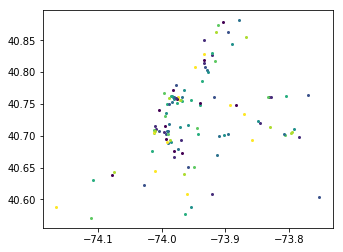

In [41]:
pedestrians_ny.plot()


In [42]:
nyc = gpd.read_file("nynta_14d/nynta.shp")
nyc.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry
0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,"POLYGON ((998870.8071899414 168503.1193847656,..."
1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,"POLYGON ((1000351.30279541 194574.900390625, 9..."
2,2,Bronx,005,BX40,Fordham South,6.307284e+06,15878.272921,"POLYGON ((1014295.119384766 253236.9890136719,..."
3,3,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227722,"POLYGON ((990897.9002075195 169268.1207885742,..."
4,3,Brooklyn,047,BK96,Rugby-Remsen Village,3.270695e+07,30957.853395,"POLYGON ((1009623.354003906 176865.7595825195,..."


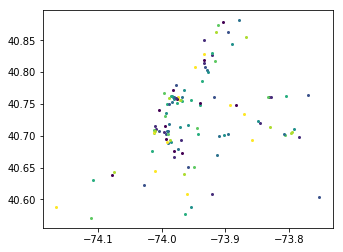

In [43]:
pedestrians_ny.plot()


In [44]:
nyc.to_crs(pedestrians_ny.crs, inplace=True)

In [45]:
pedestrians_ny.head(2)

,Borough,From_Stree,Index,Loc,Street_Nam,To_Street,geometry,2015_Total,2014_Total,2013_Total,2012_Total,2011_Total,2010_Total,2009_Total,2008_Total,2007_Total
0,Bronx,West 231st Street,N,1.0,Broadway,Naples Terrace,POINT (-73.9045914073068 40.87919896648571),120429994520498030331788,464629961450438426411220,459030081206471038251210,431522761268332833651288,38202428132844402687997,41192217863360931281010,42622469991347528321001,43103420112540152631802,26462939734409425081189
1,Bronx,Grand Concourse,Y,2.0,East 161st Street,Sheridan Avenue,POINT (-73.92188432870219 40.82662794123289),200525124790458924832318,443523881949436323152206,389018322071421522882278,409919702113187519121233,352517522051333317721734,306914771007328314092077,313727621227311113041351,328313831939263815221136,375411831855318419711511


In [46]:
## getting the lat lon from geometry
#  = pedestrians_ny.geometry.apply(lambda geo: geo.coords[0][0])

In [47]:
nyc.head(2)

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Area,Shape_Leng,geometry
0,3,Brooklyn,047,BK43,Midwood,3.579964e+07,27996.591274,POLYGON ((-73.94732672160579 40.62916656720946...
1,3,Brooklyn,047,BK75,Bedford,3.262983e+07,29992.919174,POLYGON ((-73.94193078816194 40.70072523469547...


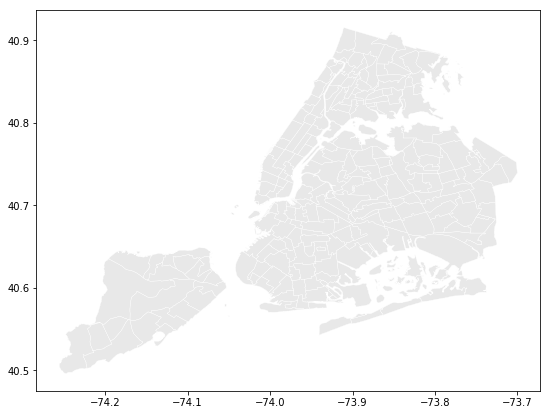

In [48]:
nyc.plot(color = "lightgrey", linewidth = 0.3, edgecolor = "white", figsize = (20,7))

(-74.283370478149223,
 -73.672229948213371,
 40.47514452610185,
 40.936503645568806)

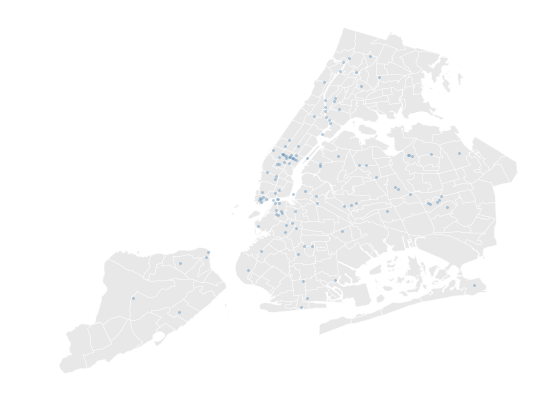

In [49]:
ax = nyc.plot(color = "lightgrey", linewidth = 0.3, edgecolor = "white", figsize = (20,7))
pedestrians_ny.plot(figsize = (20,7), alpha = 0.3, color = "steelblue", ax = ax)
ax.axis("off")

(-74.283370478149223,
 -73.672229948213371,
 40.47514452610185,
 40.936503645568806)

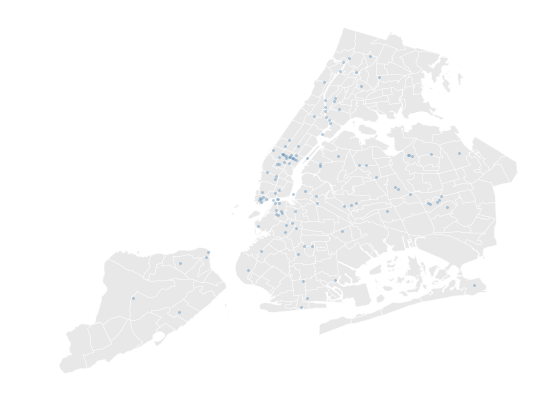

In [50]:
ax = nyc.plot(color = "lightgrey", linewidth = 0.3, edgecolor = "white", figsize = (20,7))
pedestrians_ny.plot(ax=ax, figsize = (20,7), alpha = 0.3, color = "steelblue")
ax.axis("off")

In [51]:
test = list(range(1,14))
test = pd.DataFrame(test)

In [52]:
test[0] = test[0].astype(str)
test

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [53]:
urls = "http://www.mapmyrun.com/us/new-york-city-ny/#page-" + test[0]
urls

0     http://www.mapmyrun.com/us/new-york-city-ny/#p...
1     http://www.mapmyrun.com/us/new-york-city-ny/#p...
2     http://www.mapmyrun.com/us/new-york-city-ny/#p...
3     http://www.mapmyrun.com/us/new-york-city-ny/#p...
4     http://www.mapmyrun.com/us/new-york-city-ny/#p...
5     http://www.mapmyrun.com/us/new-york-city-ny/#p...
6     http://www.mapmyrun.com/us/new-york-city-ny/#p...
7     http://www.mapmyrun.com/us/new-york-city-ny/#p...
8     http://www.mapmyrun.com/us/new-york-city-ny/#p...
9     http://www.mapmyrun.com/us/new-york-city-ny/#p...
10    http://www.mapmyrun.com/us/new-york-city-ny/#p...
11    http://www.mapmyrun.com/us/new-york-city-ny/#p...
12    http://www.mapmyrun.com/us/new-york-city-ny/#p...
Name: 0, dtype: object

In [54]:
import requests as rq
from bs4 import BeautifulSoup

In [55]:
urls
list_all_urls = []
for i in urls[:1]:
    response = rq.get(i)
    doc_total = BeautifulSoup(response.text, "html.parser")
    links = doc_total.find_all(class_="limited_text notranslate")
#     print(links)
    for link in links:
        all_urls = "http://www.mapmyrun.com" + link["href"]
        list_all_urls.append(all_urls)
        print("http://www.mapmyrun.com" + link["href"])
        


ConnectionError: HTTPConnectionPool(host='www.mapmyrun.com', port=80): Max retries exceeded with url: /us/new-york-city-ny/ (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x11266dd68>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

In [ ]:
list_all_urls

In [ ]:
del list_all_urls[-1]


In [ ]:
del list_all_urls[24]

In [ ]:
del list_all_urls[-1]

In [ ]:
del list_all_urls[-1]

In [ ]:
del list_all_urls[-1]

In [ ]:
list_all_urls[0,-1]

In [ ]:
# from selenium import webdriver
# driver = webdriver.Chrome()
# driver.get("http://www.mapmyrun.com/us/new-york-city-ny/#p...")

In [ ]:
login = driver.find_element_by_xpath('//*[@id="site_run"]/header/div[1]/nav[2]/ul/li[1]/a')
login.click()

In [ ]:
user_name = driver.find_element_by_xpath('//*[@id="email"]')
user_name.send_keys("julien1993@hotmail.ca")

In [ ]:
password = driver.find_element_by_xpath('//*[@id="password"]')
password.send_keys("Melchior1")

In [ ]:
login_button = driver.find_element_by_xpath('//*[@id="root"]/div/div[3]/div/div/form/button/span')
login_button.click()

In [ ]:
driver.get("http://www.mapmyrun.com/us/new-york-city-ny/#p...")

In [ ]:
  
#     for i in list_all_urls:
#         driver.get(i)
#         route = driver.find_element_by_xpath('//*[@id="route_88750"]/table/tbody/tr/td[2]/a')
#         route.click()
#         gpx_button = driver.find_element_by_xpath('//*[@id="export_route_gpx_btn"]')
#         gpx_button.click()

In [ ]:
driver.get("http://www.mapmyrun.com/us/new-york-city-ny/18-mile-west-side-hwy-run-route-135178")

In [ ]:
route = driver.find_element_by_xpath('//*[@id="route_88750"]/table/tbody/tr/td[2]/a')
route.click()

In [ ]:
gpx = driver.find_element_by_xpath('//*[@id="export_this_route"]')
gpx.click()

In [ ]:
gpx_button = driver.find_element_by_xpath('//*[@id="export_route_gpx_btn"]')
gpx_button.click()

In [ ]:
import gpxpy
gpx = gpxpy.parse(open('route127480.gpx'))

# print("{} track(s)".format(len(gpx.tracks)))
# track = gpx.tracks[0]

# print("{} segment(s)".format(len(track.segments)))
# segment = track.segments[0]

# print("{} point(s)".format(len(segment.points)))

In [ ]:
gpx

In [ ]:
# route = gpd.read_file("route16634.kml")
# route

In [ ]:
# import pandas as pd
# import geopandas as gp
# from shapely.geometry import Point

# route = pd.read_csv('route16634.kml',  error_bad_lines=False)
# route['geometry'] = route.apply(lambda d: Point(d.lon, d.lat), axis=1, )
# route = gp.GeoDataFrame(route)

In [ ]:
route